In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import math
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
%matplotlib inline
plt.style.use('default')
line_markers = ['-.','-,','-o','-v','-^','-<','->','-1','-2','-3','-4','-s','-p','-*','-h','-H','-+','-x','-D','-d','-|','-_']
line_markers = ['*','h','<','4','x','d','|','_']

root = './'

In [2]:
def accuracy(file_name, tasknum = 10):
    acc = np.zeros(tasknum)
    with open(file_name, 'r') as f:
        data = f.read().splitlines()
        for i in range(len(data)):
            acc[i] = data[i]
    return acc

In [3]:
def aupr_auroc_prev_new(result, idx, save=None):
    
    end = 5000 + 5000*(idx+1)
    fontsize = 15
    
    precision, recall, thresholds = precision_recall_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    fpr, tpr, thresholds = roc_curve(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    aupr = average_precision_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    auroc = roc_auc_score(result['bin_target'][0][idx][0], result['bin_prob'][0][idx][0])
    
    density_prev = np.zeros(100)
    density_new = np.zeros(100)
    result['bin_prob'][0][idx][0][:end-5000]
    bin_prob_prev = result['bin_prob'][0][idx][0][:end-5000]
    bin_prob_new = result['bin_prob'][0][idx][0][end-5000:end]
    for prob in bin_prob_prev:
        i = math.floor(prob*100)
        if i >= 100:
            i=99
        density_prev[i] += 1
    
    for prob in bin_prob_new:
        i = math.floor(prob*100)
        if i >= 100:
            i=99
        density_new[i] += 1
    
    plt.figure(figsize = (20,5))

#     plt.plot(recall, precision, linestyle='-', label='bin_prob')
#     plt.grid(b=True, which='major', axis='both')
#     plt.xlabel('Recall', fontsize=fontsize)
#     plt.ylabel('Precision', fontsize=fontsize)
#     plt.title('AURP: %.3f'%aupr, fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,1)
    plt.plot(fpr, tpr, linestyle='-', label='bin_prob')
    plt.grid(b=True, which='major', axis='both')
    plt.xlabel('FPR', fontsize=fontsize)
    plt.ylabel('TPR', fontsize=fontsize)
    plt.title('AUROC: %.3f'%auroc, fontsize=fontsize)
    
    plt.style.use('default')
    plt.subplot(1,4,2)
    plt.plot(np.arange(100)/100, density_prev, linestyle='-', label='prev')
    plt.plot(np.arange(100)/100, density_new, linestyle='-', label='new')
    plt.xlabel('Confidence', fontsize=fontsize)
    plt.xlim(0.8,1.0)
    plt.legend(loc = 'upper left')
    plt.title('density', fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,3)
    plt.plot(np.arange(end-5000), np.sort(result['bin_prob'][0][idx][0][:end-5000]), linestyle='-')
    plt.grid(b=True, which='major', axis='both')
    plt.ylabel('Confidence', fontsize=fontsize)
    plt.title('Prev class', fontsize=fontsize)

    plt.style.use('default')
    plt.subplot(1,4,4)
    plt.plot(np.arange(5000), np.sort(result['bin_prob'][0][idx][0][end-5000:end]), linestyle='-')
    plt.grid(b=True, which='major', axis='both')
    plt.ylabel('Confidence', fontsize=fontsize)
    plt.title('New class', fontsize=fontsize)


    print(np.mean(result['bin_prob'][0][idx][0][:end-5000]))
    print(np.mean(result['bin_prob'][0][idx][0][end-5000:end]))
    
    if save is not None:
        plt.tight_layout()
        plt.savefig('./figures/'+save+'.pdf')

In [4]:
plt.figure(figsize = (0.1,0.1))
plt.style.use('default')
plt.plot(range(5),range(5))
plt.xticks(visible=False)
plt.yticks(visible=False)

(array([-2.5,  0. ,  2.5,  5. ]), <a list of 4 Text yticklabel objects>)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
[[ 2055   125  2820  4153   808    39 10000]
 [ 3089   435  6476  4193   780    27 15000]
 [ 3583   612 10805  4196   779    25 20000]
 [ 3782   945 15273  4188   787    25 25000]
 [ 4072  1112 19816  4247   739    14 30000]
 [ 4407  1498 24095  4266   713    21 35000]
 [ 4857  1705 28438  4257   731    12 40000]
 [ 4781  1775 33444  4169   818    13 45000]
 [ 4117  1636 39247  4367   622    11 50000]]
[62, 48, 38, 31, 27, 24, 22, 19, 16]
[85 80 71 66 60 55 52 50 46 45]
[96 94 90 87 84 80 78 76 73 71]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [77. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [75. 74. 84.  0.  0.  0.  0.  0.  0.  0.]
 [74. 71. 76. 84.  0.  0.  0.  0.  0.  0.]
 [73. 71. 72. 75. 83.  0.  0.  0.  0.  0.]
 [72. 69. 70. 72. 75. 85.  0.  0.  0.  0.]
 [70. 68. 69. 71. 72. 76. 85.  0.  0.  0.]
 [70. 68. 68. 69. 70. 73

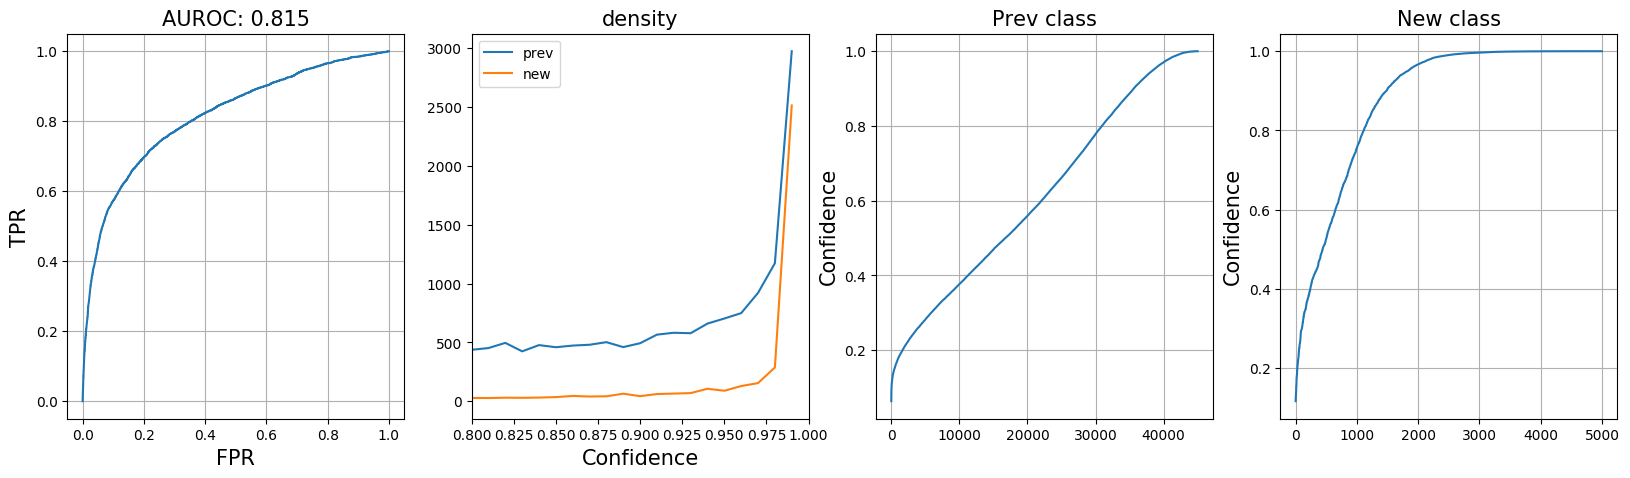

In [5]:
result = sio.loadmat(root+'RESULT_Imagenet_coreset_0_memsz_5000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_5_RingBuffer_CE_lr_change.mat')
print(result.keys())
print(result['all'][0][0][2])
acc_arr = []
for i in range(len(result['all'][0][0][2])):
    arr = result['all'][0][0][2][i]
    acc_arr.append(int((arr[0]+arr[3])/arr[6] * 100))
print(acc_arr)
print(result['cheat'][0][0][0][0])
print(result['cheat'][0][0][1][0])

print(result['task_soft_1'])

idx = 8
print(result['auroc'][0])
aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
[[ 2680   199  2121  4117   809    74 10000]
 [ 4366   640  4994  4174   765    61 15000]
 [ 5488  1044  8468  4181   766    53 20000]
 [ 6219  1543 12238  4169   762    69 25000]
 [ 6940  1893 16167  4202   759    39 30000]
 [ 7599  2738 19663  4247   693    60 35000]
 [ 8509  3311 23180  4265   683    52 40000]
 [ 8633  3377 27990  4179   775    46 45000]
 [ 8840  3651 32509  4333   624    43 50000]]
[67, 56, 48, 41, 37, 33, 31, 28, 26]
[85 81 74 68 64 59 56 53 51 49]
[96 95 91 88 85 83 80 79 76 75]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [80. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [78. 76. 84.  0.  0.  0.  0.  0.  0.  0.]
 [77. 74. 77. 84.  0.  0.  0.  0.  0.  0.]
 [76. 73. 75. 77. 83.  0.  0.  0.  0.  0.]
 [76. 72. 73. 74. 77. 84.  0.  0.  0.  0.]
 [75. 71. 73. 74. 75. 78. 85.  0.  0.  0.]
 [75. 71. 72. 72. 73. 75

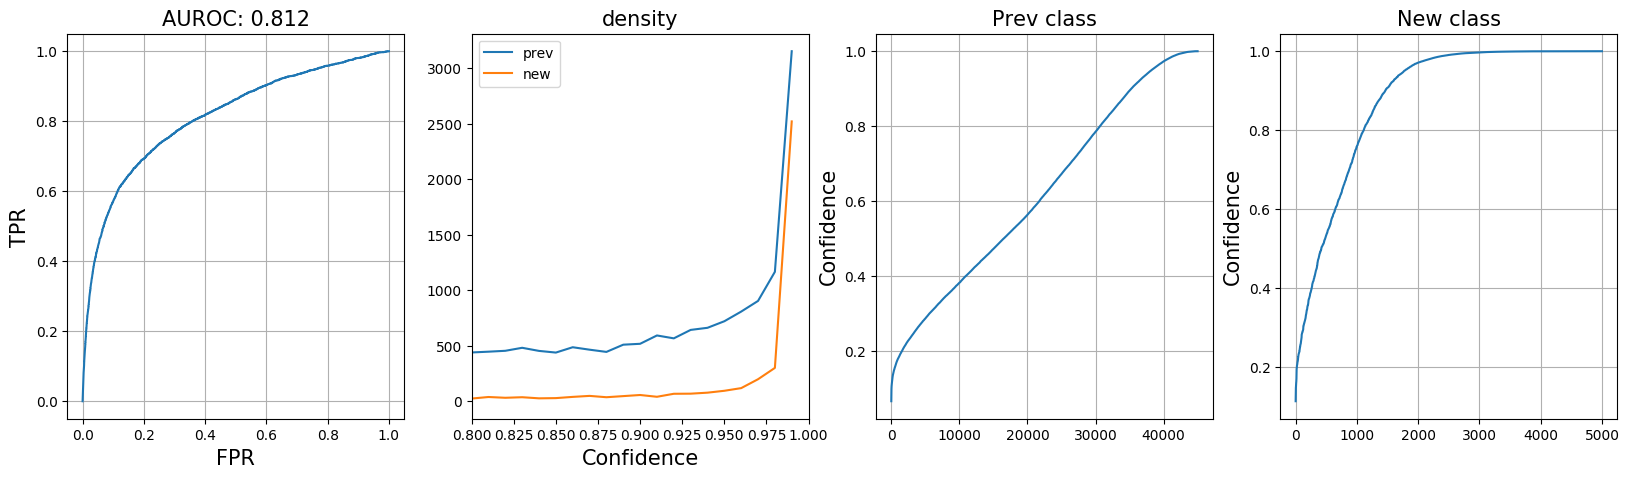

In [6]:
result = sio.loadmat(root+'RESULT_Imagenet_coreset_0_memsz_10000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_5_RingBuffer_CE_lr_change.mat')
print(result.keys())
print(result['all'][0][0][2])
acc_arr = []
for i in range(len(result['all'][0][0][2])):
    arr = result['all'][0][0][2][i]
    acc_arr.append(int((arr[0]+arr[3])/arr[6] * 100))
print(acc_arr)
print(result['cheat'][0][0][0][0])
print(result['cheat'][0][0][1][0])

print(result['task_soft_1'])

idx = 8
print(result['auroc'][0])
aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
[[ 3169   265  1566  4103   727   170 10000]
 [ 5408   838  3754  4104   758   138 15000]
 [ 7044  1467  6489  4140   738   122 20000]
 [ 8484  2168  9348  4106   757   137 25000]
 [ 9520  2898 12582  4208   692   100 30000]
 [10888  4041 15071  4216   648   136 35000]
 [12074  4730 18196  4237   651   112 40000]
 [12893  5232 21875  4133   763   104 45000]
 [13372  5839 25789  4285   613   102 50000]]
[72, 63, 55, 50, 45, 43, 40, 37, 35]
[85 82 76 71 67 62 59 57 54 53]
[96 95 92 89 87 84 82 81 79 77]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [82. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 78. 83.  0.  0.  0.  0.  0.  0.  0.]
 [79. 76. 78. 83.  0.  0.  0.  0.  0.  0.]
 [80. 75. 77. 78. 83.  0.  0.  0.  0.  0.]
 [79. 75. 76. 76. 77. 85.  0.  0.  0.  0.]
 [78. 74. 75. 75. 76. 79. 85.  0.  0.  0.]
 [78. 74. 75. 74. 75. 77

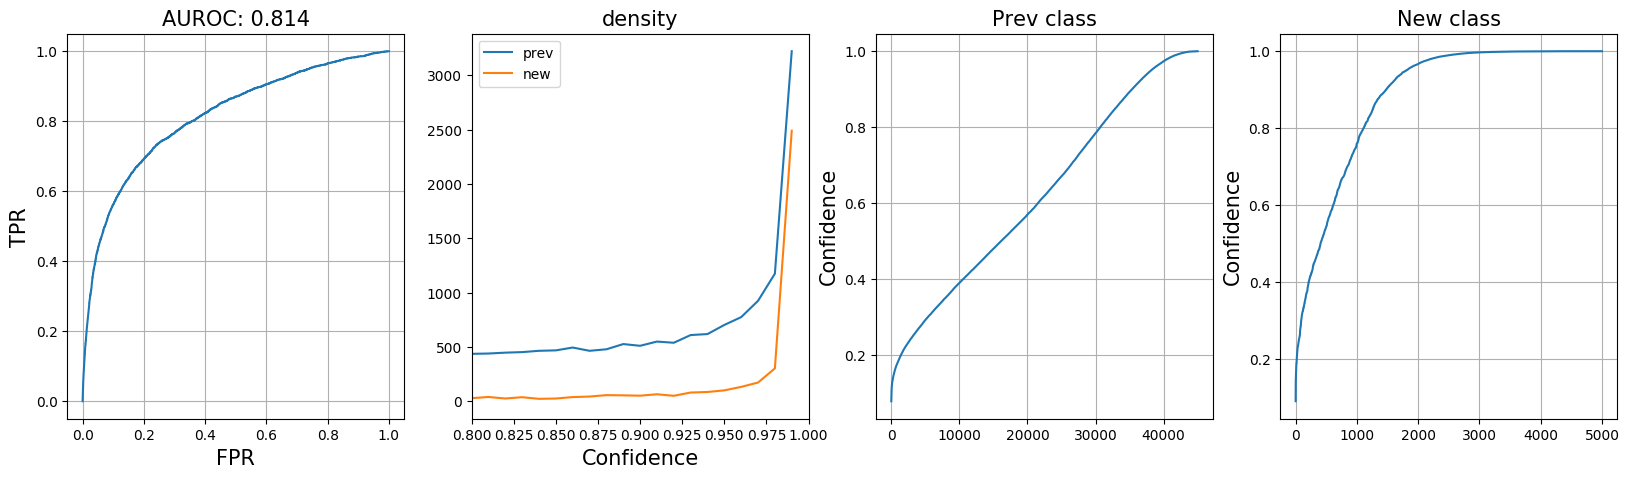

In [7]:
result = sio.loadmat(root+'RESULT_Imagenet_coreset_0_memsz_20000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_5_RingBuffer_CE_lr_change.mat')
print(result.keys())
print(result['all'][0][0][2])
acc_arr = []
for i in range(len(result['all'][0][0][2])):
    arr = result['all'][0][0][2][i]
    acc_arr.append(int((arr[0]+arr[3])/arr[6] * 100))
print(acc_arr)
print(result['cheat'][0][0][0][0])
print(result['cheat'][0][0][1][0])

print(result['task_soft_1'])

idx = 8
print(result['auroc'][0])
aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
[[ 3262   562  1176  3817   567   616 10000]
 [ 5491  2223  2286  3840   466   694 15000]
 [ 7269  4129  3602  3813   476   711 20000]
 [ 8930  6769  4301  3616   381  1003 25000]
 [10367  9610  5023  3621   277  1102 30000]
 [11381 12659  5960  3730   270  1000 35000]
 [12779 15404  6817  3703   260  1037 40000]
 [14013 19117  6870  3426   274  1300 45000]
 [14195 21179  9626  3724   245  1031 50000]]
[70, 62, 55, 50, 46, 43, 41, 38, 35]
[86 80 70 64 58 54 50 47 44 42]
[96 94 90 85 82 79 75 73 70 68]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [78. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [74. 72. 83.  0.  0.  0.  0.  0.  0.  0.]
 [72. 69. 74. 83.  0.  0.  0.  0.  0.  0.]
 [70. 68. 70. 73. 83.  0.  0.  0.  0.  0.]
 [70. 66. 69. 70. 73. 84.  0.  0.  0.  0.]
 [68. 66. 67. 68. 69. 74. 85.  0.  0.  0.]
 [68. 66. 66. 66. 67. 70

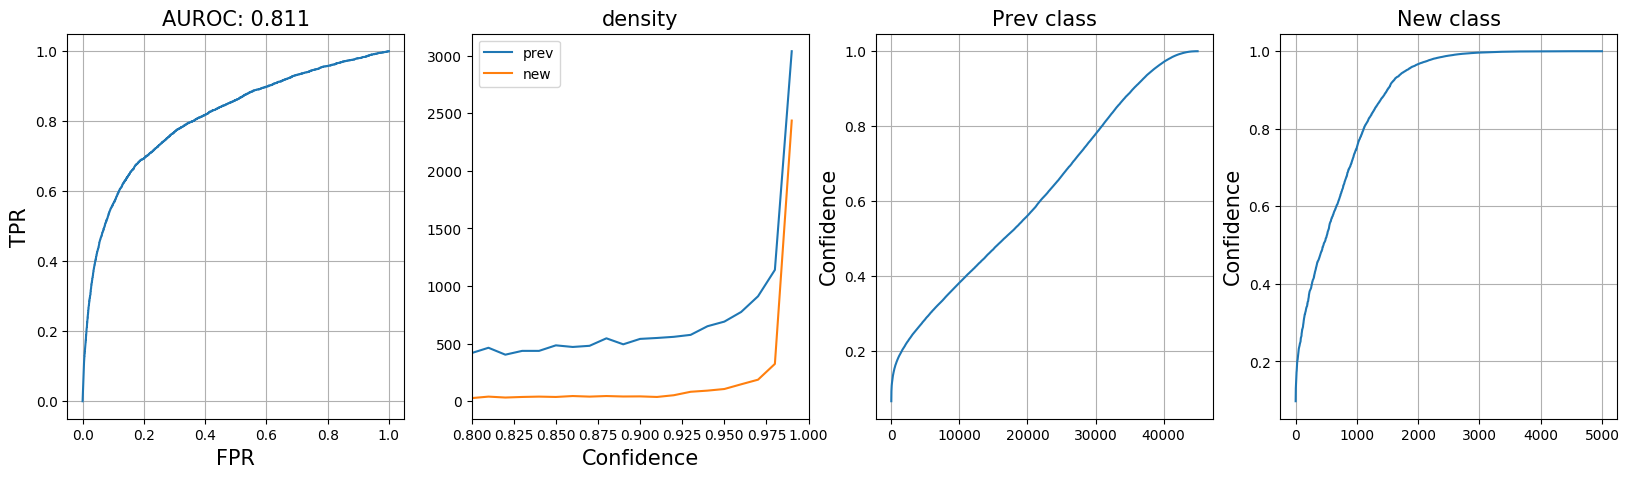

In [8]:
result = sio.loadmat(root+'RESULT_Imagenet_er_0_memsz_5000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_5_RingBuffer_CE_lr_change.mat')
print(result.keys())
print(result['all'][0][0][2])
acc_arr = []
for i in range(len(result['all'][0][0][2])):
    arr = result['all'][0][0][2][i]
    acc_arr.append(int((arr[0]+arr[3])/arr[6] * 100))
print(acc_arr)
print(result['cheat'][0][0][0][0])
print(result['cheat'][0][0][1][0])

print(result['task_soft_1'])

idx = 8
print(result['auroc'][0])
aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
[[ 3428   500  1072  3818   561   621 10000]
 [ 5946  1993  2061  3838   491   671 15000]
 [ 8096  3809  3095  3773   469   758 20000]
 [10180  6358  3462  3535   315  1150 25000]
 [11829  9124  4047  3545   258  1197 30000]
 [13119 12081  4800  3600   286  1114 35000]
 [14805 14902  5293  3598   225  1177 40000]
 [16469 18323  5208  3262   242  1496 45000]
 [17084 20737  7179  3557   203  1240 50000]]
[72, 65, 59, 54, 51, 47, 46, 43, 41]
[85 81 73 68 62 58 54 51 49 46]
[96 94 91 87 84 81 78 76 74 72]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [80. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [78. 75. 83.  0.  0.  0.  0.  0.  0.  0.]
 [76. 73. 76. 83.  0.  0.  0.  0.  0.  0.]
 [76. 72. 74. 76. 84.  0.  0.  0.  0.  0.]
 [75. 71. 72. 73. 75. 84.  0.  0.  0.  0.]
 [74. 70. 71. 71. 72. 76. 85.  0.  0.  0.]
 [72. 69. 70. 71. 71. 73

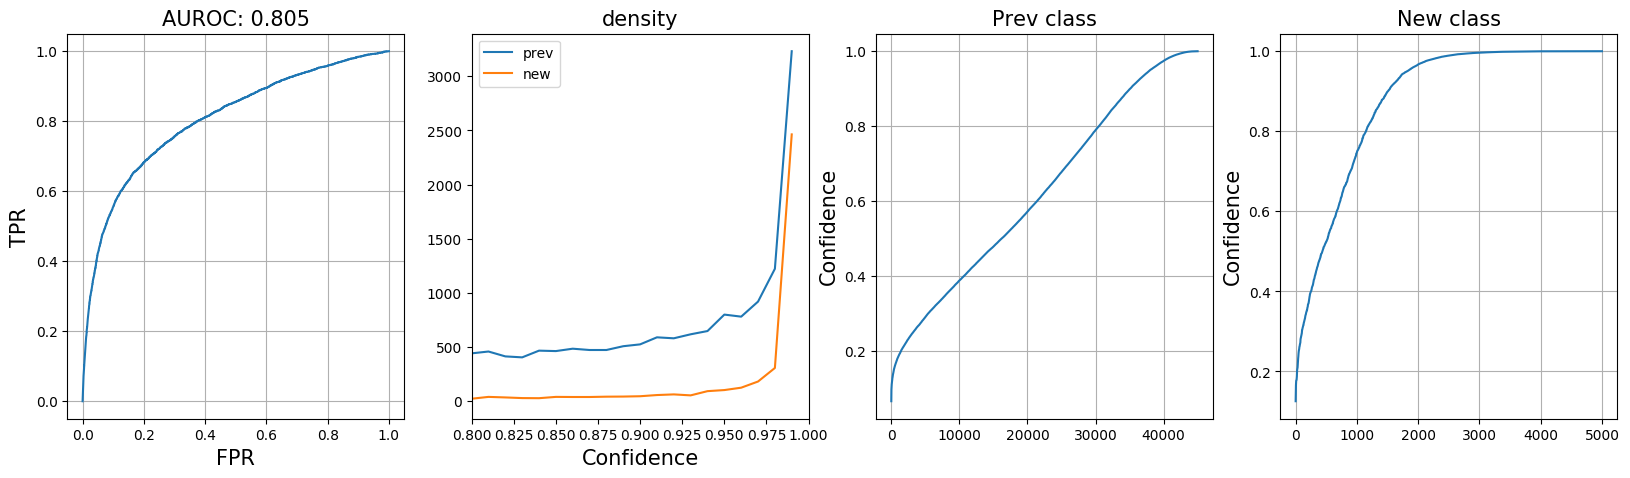

In [9]:
result = sio.loadmat(root+'RESULT_Imagenet_er_0_memsz_10000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_5_RingBuffer_CE_lr_change.mat')
print(result.keys())
print(result['all'][0][0][2])
acc_arr = []
for i in range(len(result['all'][0][0][2])):
    arr = result['all'][0][0][2][i]
    acc_arr.append(int((arr[0]+arr[3])/arr[6] * 100))
print(acc_arr)
print(result['cheat'][0][0][0][0])
print(result['cheat'][0][0][1][0])

print(result['task_soft_1'])

idx = 8
print(result['auroc'][0])
aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
[[ 3457   457  1086  3908   562   530 10000]
 [ 6117  1718  2165  3892   521   587 15000]
 [ 8479  3325  3196  3861   487   652 20000]
 [10858  5596  3546  3620   356  1024 25000]
 [12960  8184  3856  3557   272  1171 30000]
 [14617 10909  4474  3648   287  1065 35000]
 [16481 13496  5023  3566   220  1214 40000]
 [18352 16987  4661  3309   250  1441 45000]
 [19247 19384  6369  3594   200  1206 50000]]
[73, 66, 61, 57, 55, 52, 50, 48, 45]
[86 82 75 70 66 62 58 55 53 51]
[96 95 92 89 87 84 82 80 78 76]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 83.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 77. 83.  0.  0.  0.  0.  0.  0.  0.]
 [80. 76. 78. 84.  0.  0.  0.  0.  0.  0.]
 [80. 75. 76. 78. 83.  0.  0.  0.  0.  0.]
 [80. 74. 76. 76. 77. 84.  0.  0.  0.  0.]
 [79. 74. 75. 74. 75. 79. 85.  0.  0.  0.]
 [78. 73. 74. 74. 75. 75

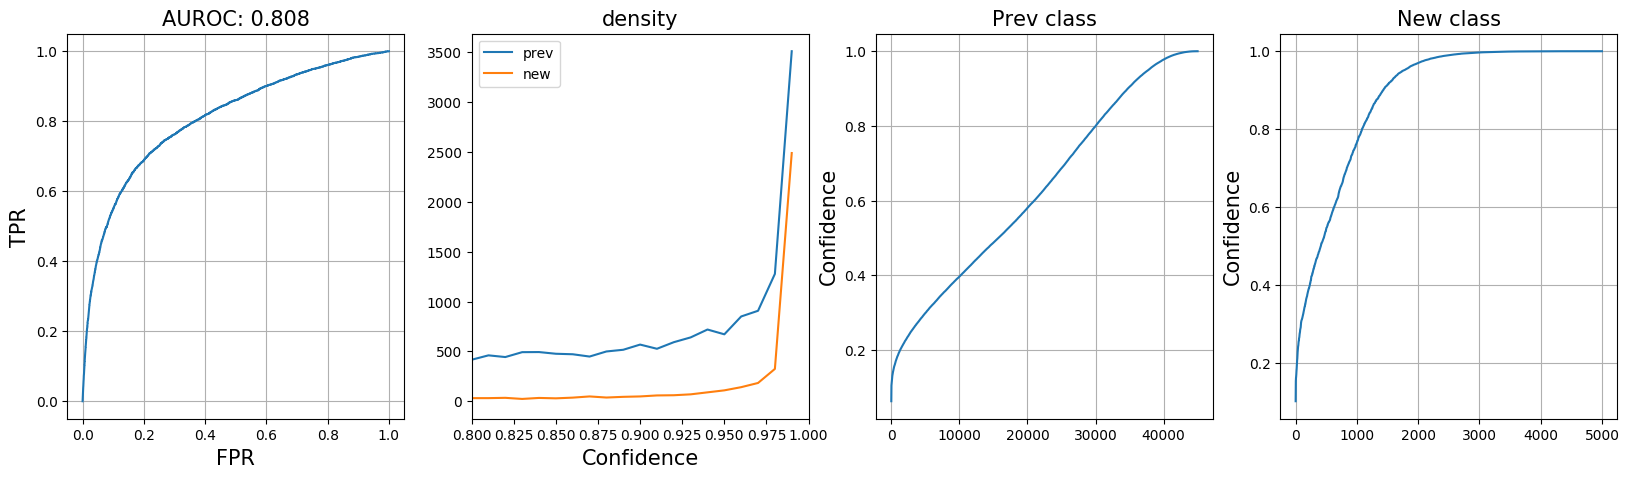

In [10]:
result = sio.loadmat(root+'RESULT_Imagenet_er_0_memsz_20000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_5_RingBuffer_CE_lr_change.mat')
print(result.keys())
print(result['all'][0][0][2])
acc_arr = []
for i in range(len(result['all'][0][0][2])):
    arr = result['all'][0][0][2][i]
    acc_arr.append(int((arr[0]+arr[3])/arr[6] * 100))
print(acc_arr)
print(result['cheat'][0][0][0][0])
print(result['cheat'][0][0][1][0])

print(result['task_soft_1'])

idx = 8
print(result['auroc'][0])
aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
[[ 3328   439  1233  3859   590   551 10000]
 [ 6182  1903  1915  3723   499   778 15000]
 [ 8732  3743  2525  3505   434  1061 20000]
 [11051  6027  2922  3278   307  1415 25000]
 [12959  8637  3404  3216   257  1527 30000]
 [14708 11672  3620  3238   236  1526 35000]
 [16436 14675  3889  3177   217  1606 40000]
 [18182 17827  3991  2870   214  1916 45000]
 [19535 20709  4756  3002   151  1847 50000]]
[71, 66, 61, 57, 53, 51, 49, 46, 45]
[86 81 74 69 64 60 57 54 51 49]
[96 95 91 89 86 84 81 79 78 76]
[[86.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [81. 82.  0.  0.  0.  0.  0.  0.  0.  0.]
 [79. 76. 82.  0.  0.  0.  0.  0.  0.  0.]
 [79. 75. 76. 83.  0.  0.  0.  0.  0.  0.]
 [79. 75. 75. 77. 83.  0.  0.  0.  0.  0.]
 [79. 74. 75. 75. 76. 84.  0.  0.  0.  0.]
 [78. 74. 75. 74. 75. 77. 84.  0.  0.  0.]
 [78. 73. 74. 73. 73. 75

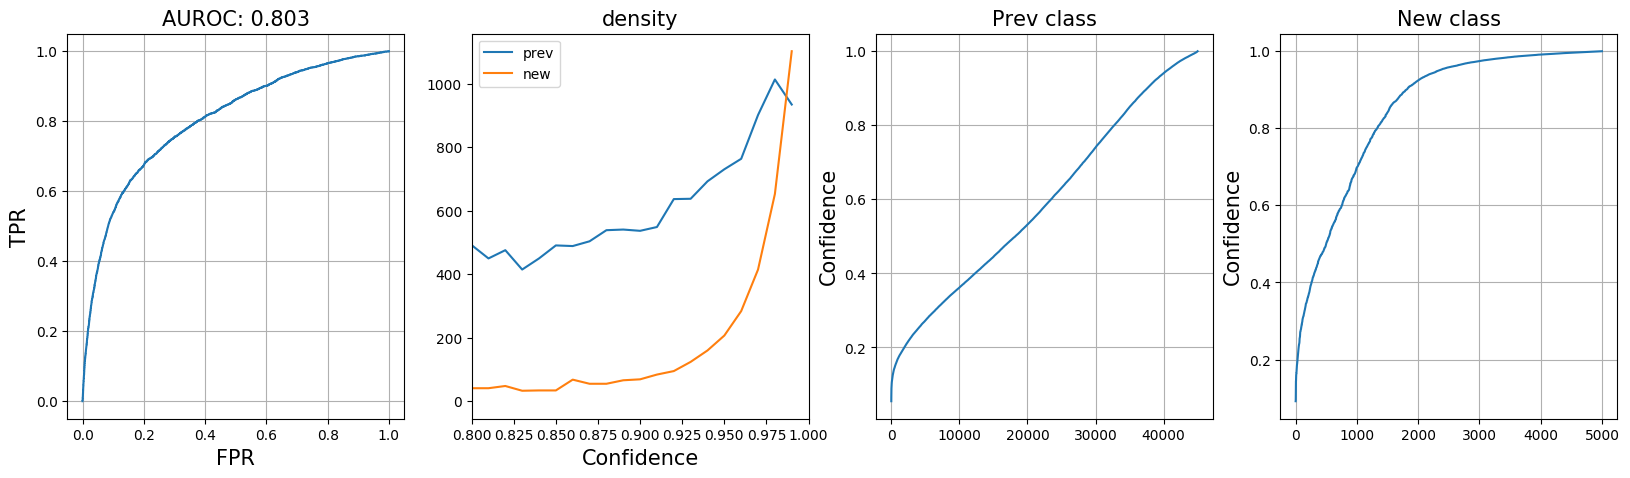

In [19]:
result = sio.loadmat(root+'RESULT_Imagenet_er_0_memsz_20000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_5_RingBuffer_CE_CutMix_lr_change.mat')
print(result.keys())
print(result['all'][0][0][2])
acc_arr = []
for i in range(len(result['all'][0][0][2])):
    arr = result['all'][0][0][2][i]
    acc_arr.append(int((arr[0]+arr[3])/arr[6] * 100))
print(acc_arr)
print(result['cheat'][0][0][0][0])
print(result['cheat'][0][0][1][0])

print(result['task_soft_1'])

idx = 8
print(result['auroc'][0])
aupr_auroc_prev_new(result, idx)

In [23]:
result = sio.loadmat(root+'RESULT_Imagenet_er_0_memsz_20000_alpha_1_beta_0.0001_base_100_replay_32_batch_128_epoch_100_factor_5_RingBuffer_CE_KD_lr_change.mat')
print(result.keys())
print(result['all'][0][0][2])
acc_arr = []
for i in range(len(result['all'][0][0][2])):
    arr = result['all'][0][0][2][i]
    acc_arr.append(int((arr[0]+arr[3])/arr[6] * 100))
print(acc_arr)
print(result['cheat'][0][0][0][0])
print(result['cheat'][0][0][1][0])

print(result['task_soft_1'])

idx = 8
print(result['auroc'][0])
aupr_auroc_prev_new(result, idx)

dict_keys(['__header__', '__version__', '__globals__', 'all', 'prev_new', 'task', 'cheat', 'bin_target', 'bin_prob', 'sigmoid', 'auroc', 'task_soft_1', 'task_soft_5'])
[]
[]
[85]
[96]
[[85.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


IndexError: index 0 is out of bounds for axis 0 with size 0

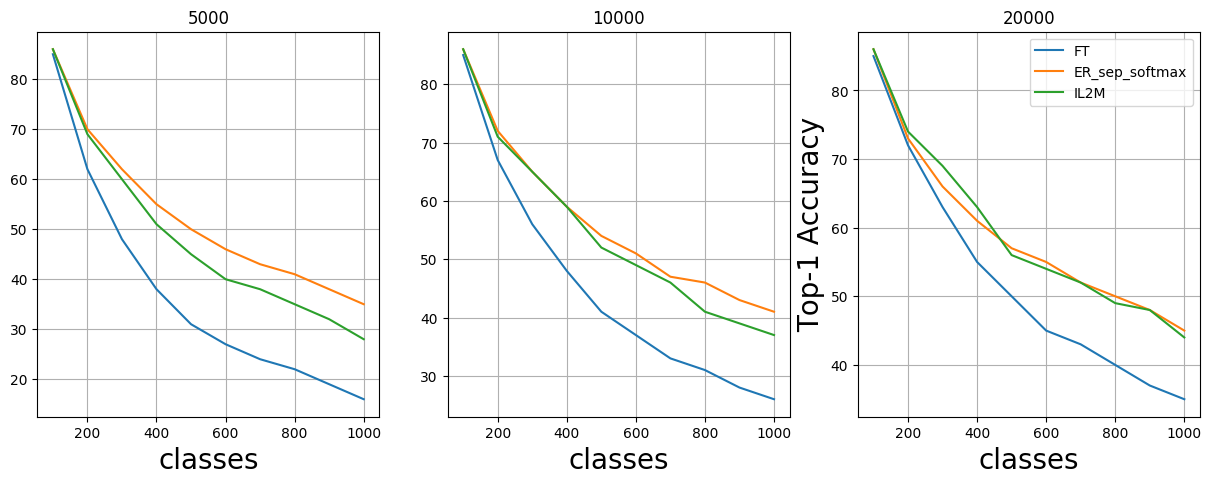

In [16]:
coreset = {}
er = {}
IL2M = {}
coreset['5000'] = [85, 62, 48, 38, 31, 27, 24, 22, 19, 16]
coreset['10000'] = [85, 67, 56, 48, 41, 37, 33, 31, 28, 26]
coreset['20000'] = [85, 72, 63, 55, 50, 45, 43, 40, 37, 35]

er['5000'] = [86, 70, 62, 55, 50, 46, 43, 41, 38, 35]
er['10000'] = [86, 72, 65, 59, 54, 51, 47, 46, 43, 41]
er['20000'] = [86, 73, 66, 61, 57, 55, 52, 50, 48, 45]

IL2M['5000'] = [86, 69, 60, 51, 45, 40, 38, 35, 32, 28]
IL2M['10000'] = [86, 71, 65, 59, 52, 49, 46, 41, 39, 37]
IL2M['20000'] = [86, 74, 69, 63, 56, 54, 52, 49, 48, 44]

plt.figure(figsize = (15,5))

for i, mem in enumerate(['5000', '10000', '20000']):
    plt.style.use('default')
    plt.subplot(1,3,i+1)
    plt.plot((np.arange(10)+1)*100, coreset[mem], label = 'FT')
    plt.plot((np.arange(10)+1)*100, er[mem], label = 'ER_sep_softmax')
    plt.plot((np.arange(10)+1)*100, IL2M[mem], label = 'IL2M')
    plt.title(mem)
    plt.grid(b=True, which='major', axis='both')
    plt.xlabel('classes', fontsize=20)

plt.ylabel('Top-1 Accuracy', fontsize=20)
plt.legend(loc='upper right')